In [297]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [298]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

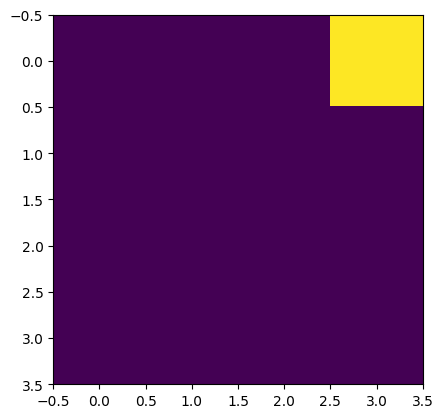

In [299]:
output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((4, 4))
 # grid[np.random.randint(4), np.random.randint(4)] = 1
  grid[0,3] = 1


  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

In [300]:
# start = [3, 0]
# owl= [2, 3]
# wand= [1, 0]
# voldy= [1, 2]
# umbridge =[0,1]
# end= [0, 3]

In [301]:
action_lookup = {0:'Down',1:'Up', 2:'Right', 3:'Left'}
state_dict = dict()
k=0
for i in range(4):
  for j in range(4):
    state_dict[(i,j)] = k
    k = k+1

In [302]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):

        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 50

        self.timestep = 0
        self.agent_pos = [3, 0]
        self.goal_pos = [0, 3]
        self.owl = [2, 3]
        self.wand = [1, 0]
        self.voldy = [0, 1]
        self.umbridge = [1, 2]

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 10
        self.state[tuple(self.owl)] = 4
        self.state[tuple(self.wand)] = 6
        self.state[tuple(self.voldy)] = -4
        self.state[tuple(self.umbridge)] = -6

        self.image_paths = {
            1: '/harry.png',
            10: '/snitch.png',
            4: '/owl.png',
            6: '/wand.png',
            -4: '/umbridge.png',
            -6: '/voldy.png' }
        
    def reset(self, **kwargs):

        self.timestep = 0
        self.agent_pos = [3, 0]
        self.goal_pos = [0, 3]
        self.owl = [2, 3]
        self.money2 = [1, 0]
        self.voldy = [0, 1]
        self.umbridge = [1, 2]

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 10
        self.state[tuple(self.owl)] = 4
        self.state[tuple(self.wand)] = 6
        self.state[tuple(self.voldy)] = -4
        self.state[tuple(self.umbridge)] = -6
        observation = self.state.flatten()

        info = {}

        return observation, info
    
    def step(self, action):

        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1

        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 10
        self.state[tuple(self.owl)] = 4
        self.state[tuple(self.wand)] = 6
        self.state[tuple(self.voldy)] = -4
        self.state[tuple(self.umbridge)] = -6
        observation = self.state.flatten()
        
    
        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
          reward = 10
        if np.array_equal(self.agent_pos, self.owl):
          reward = 4
        if np.array_equal(self.agent_pos, self.wand):
          reward = 6
        if np.array_equal(self.agent_pos, self.voldy):
          reward = -4
        if np.array_equal(self.agent_pos, self.umbridge):
          reward = -6

        self.timestep += 1

        terminated = True if ((self.timestep >= self.max_timesteps) or (self.agent_pos == self.goal_pos).all()) else False

        # terminated = True if self.timestep >= self.max_timesteps else False
        truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 2)) else False

        info = {}
        
        return observation, reward, terminated, truncated, info ,self.agent_pos, state_dict[tuple(self.agent_pos)]
        
    def render(self):
      plt.imshow(self.state)

      fig, ax = plt.subplots()
      #rotated_state = np.rot90(self.state, k=3)

      for i in range(self.state.shape[0]):
          for j in range(self.state.shape[1]):
              value = self.state[i, j]

              if value != 0:
                  img = plt.imread(self.image_paths[value])

                  extent = [j, j+1, self.state.shape[0]-i-1, self.state.shape[0]-i]

                  ax.imshow(img, extent=extent)

      ax.set_xlim([0, self.state.shape[1]])
      ax.set_ylim([0, self.state.shape[0]])

      plt.show()


In [303]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

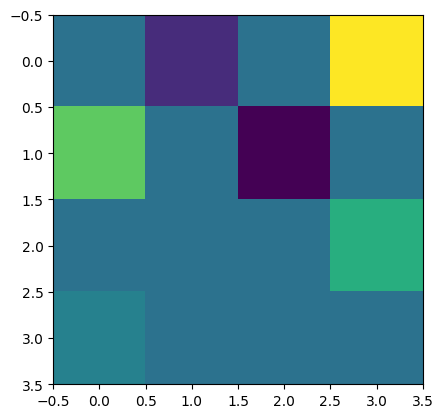

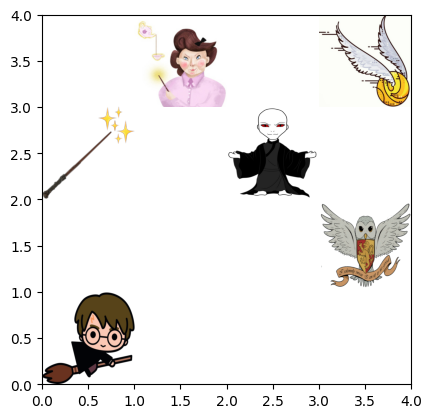

<IPython.core.display.Javascript object>

[3 0] Left 0


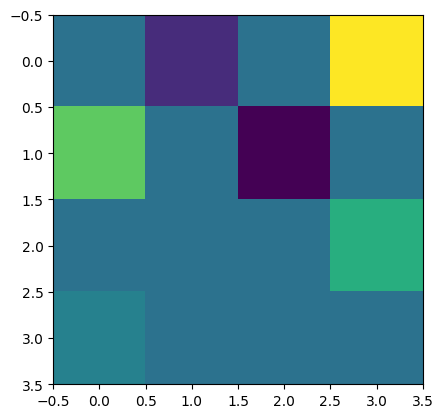

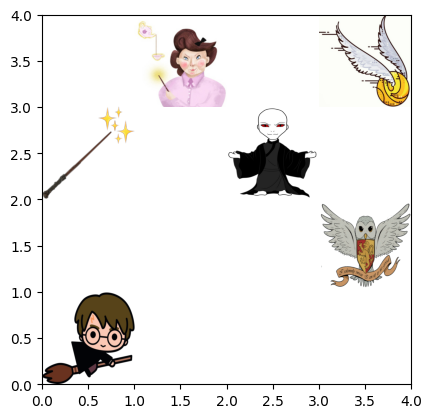

[2 0] Up 0


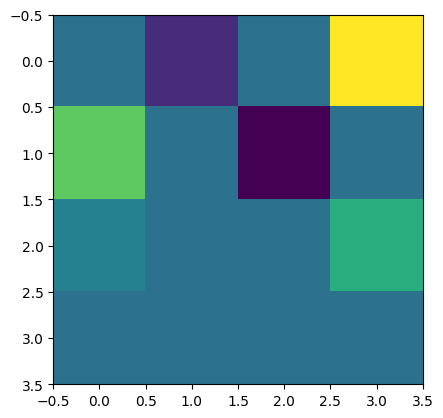

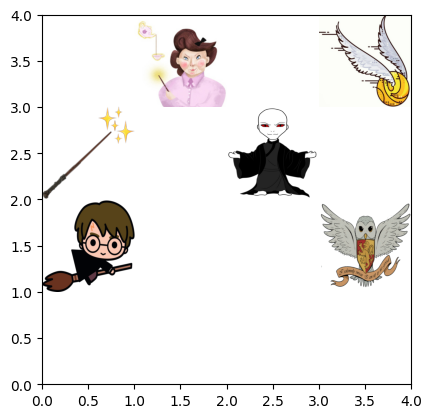

[1 0] Up 6


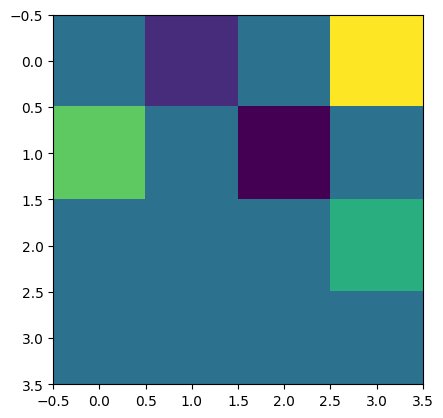

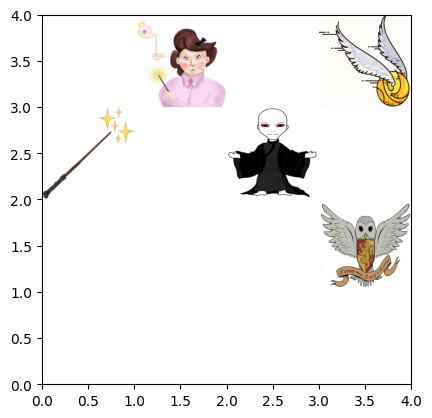

[1 0] Left 6


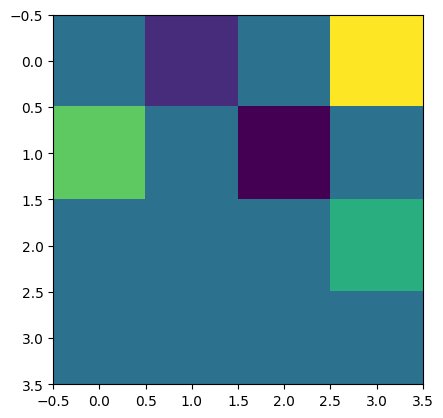

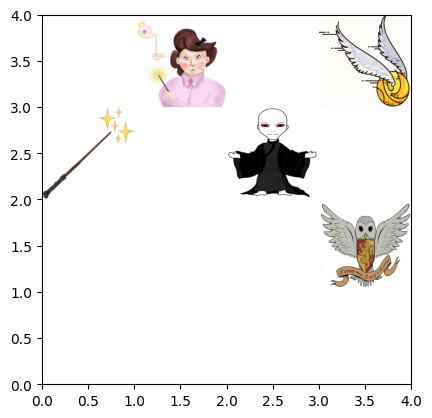

[1 1] Right 0


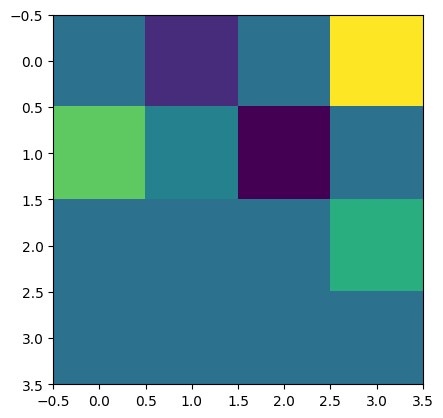

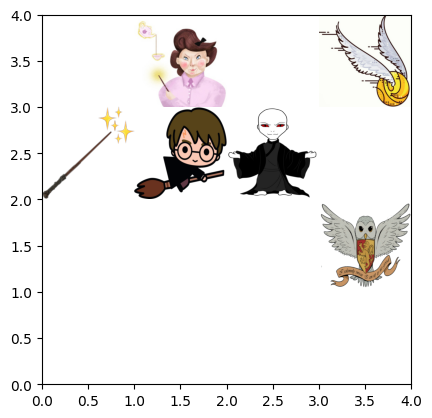

[2 1] Down 0


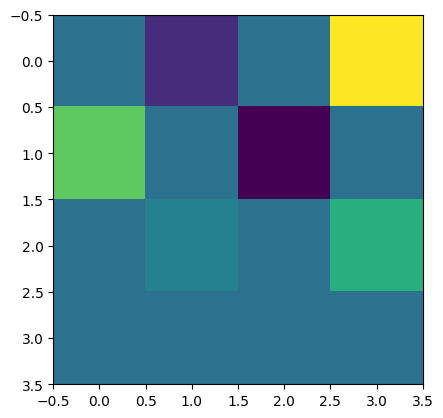

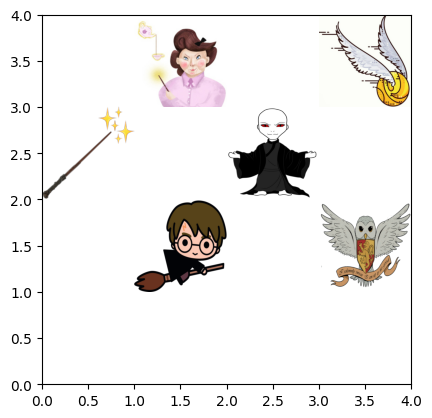

[1 1] Up 0


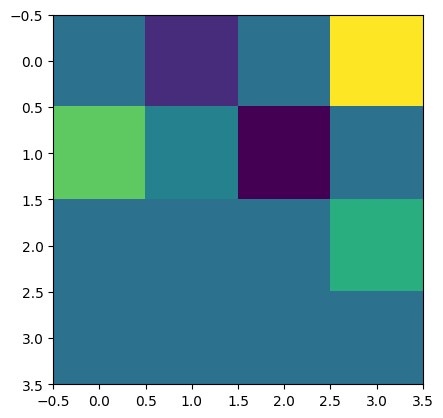

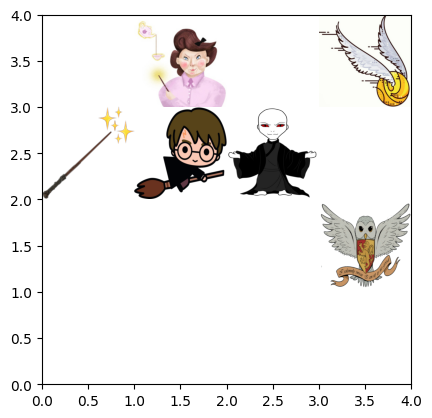

[1 2] Right -6


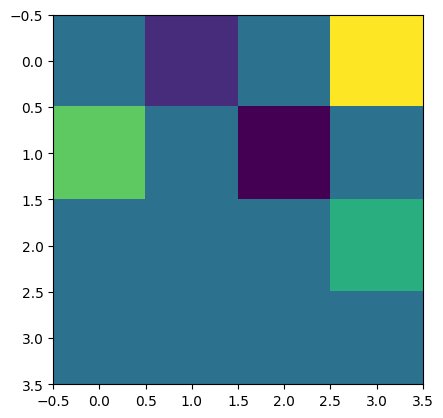

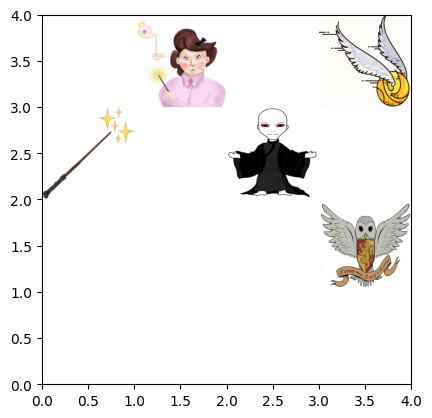

[0 2] Up 0


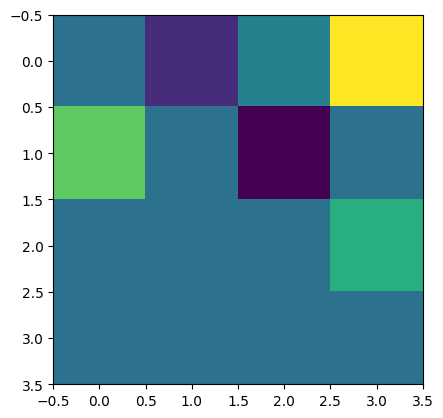

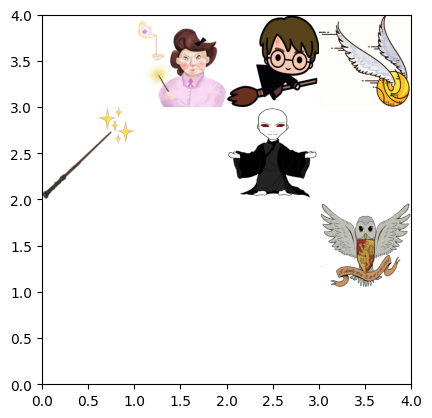

[0 3] Right 10


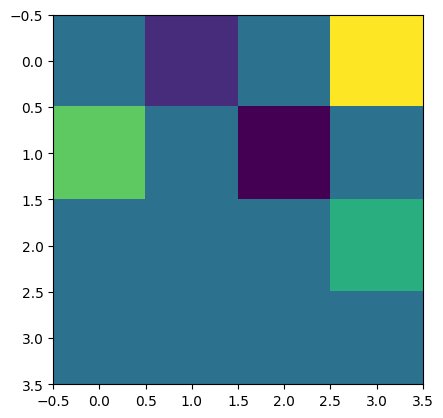

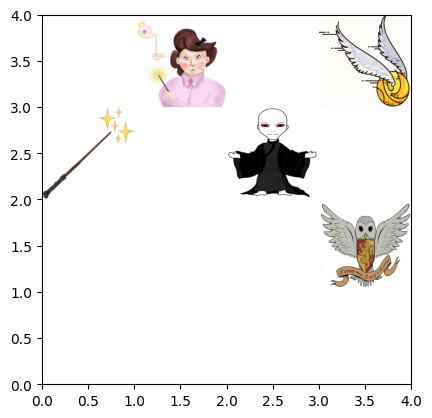

total score 16


In [304]:
env = GridEnvironment()
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

score=0
while not terminated:
  action = agent.step(obs)
  obs, reward, terminated, truncated, info , position ,_= env.step(action)
  score = score +reward


  print(env.agent_pos,action_lookup[action],reward)
  # with output_grid.output_to(0, 0):
  #   output_grid.clear_cell()
  env.render()
  time.sleep(1)
print("total score", score)

In [305]:
class SARSA(RandomAgent):

  def __init__(self, env:gym.Env, discount_rate, learning_rate, epsilon,epsilon_decay_rate) ->None :
    super().__init__(env)
    self.alpha= learning_rate
    self.epsilon= epsilon
    self.env = env
    self.gamma= discount_rate
    self.epsilon_decay_rate = epsilon_decay_rate
    self.Q_table = np.zeros((self.observation_space.n, self.action_space.n))

  def step(self, state: int)-> int:
   
    Q_state= self.Q_table[state]
    greedy_action = np.argmax(Q_state)
    random_action = super().step(state)
    return random_action if np.random.random() < self.epsilon else greedy_action

  def train(self, experience: tuple):
      state, action, next_state, next_action, reward, done = experience
      next_Q = self.Q_table[next_state, next_action]
      target = reward + self.gamma * next_Q * (1 - int(done))
      error = target - self.Q_table[state, action]
      self.Q_table[state, action] += self.alpha * error
      if done:
        self.epsilon *= self.epsilon_decay_rate



In [306]:
# SETUP 1
env = GridEnvironment()
agent = SARSA(env=env, discount_rate= 0.9, learning_rate= 0.1, epsilon= 1.0 ,epsilon_decay_rate=0.99)


num_episodes = 500


num_success = 0
num_fail = 0
total_reward = 0

epsilon_decay1 = []
episode_reward1 = []
episode_timestep1 = []

for episode in range(num_episodes):
    
    env.reset()
    state = state_dict[tuple([3,0])]

    
    done = False
    episode_reward_this = 0
    episode_timestep_this = 0
    num_bad_states = 0

   
    action = agent.step(state)

    
    while not done:
        
        _, reward, done, _, _, _, next_state = env.step(action)

       
        next_action = agent.step(next_state)

        agent.train(experience=(state, action, next_state, next_action, reward, done))

       
        state = next_state
        action = next_action
        episode_reward_this += reward
        total_reward += reward
        episode_timestep_this += 1
        num_bad_states += 1 if reward < 0 else 0


    episode_timestep1.append(episode_timestep_this)
    epsilon_decay1.append(agent.epsilon)
    episode_reward1.append(episode_reward_this)

    
    if done and env.timestep < 50:
        num_success += 1
    elif done and env.timestep == 50:
        num_fail += 1

print('\n Goal reached {} times and failed {} times'.format(num_success, num_fail))
print('End position of agent is in state {} with a total reward of {}'.format(state, total_reward))



 Goal reached 43 times and failed 457 times
End position of agent is in state 4 with a total reward of 117098


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

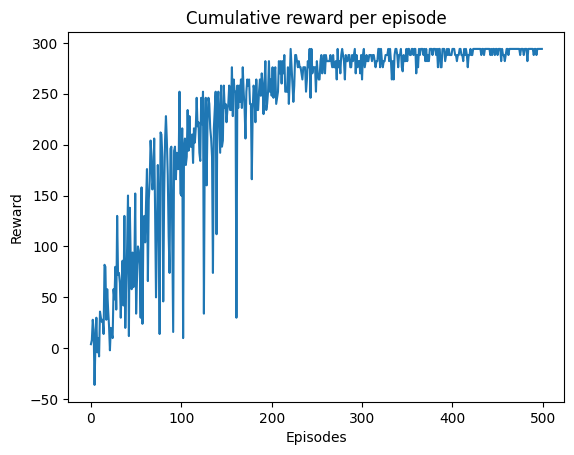

In [307]:
with output_grid.output_to(0, 0):
  plt.title('Cumulative reward per episode')
  plt.plot(episode_reward1)
  plt.xlabel('Episodes')
  plt.ylabel('Reward')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

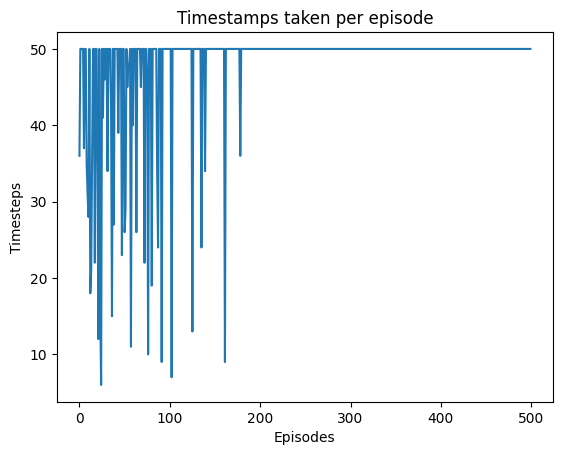

In [308]:
with output_grid.output_to(0, 0):
  plt.title('Timestamps taken per episode')
  plt.plot(episode_timestep1)
  plt.xlabel('Episodes')
  plt.ylabel('Timesteps')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

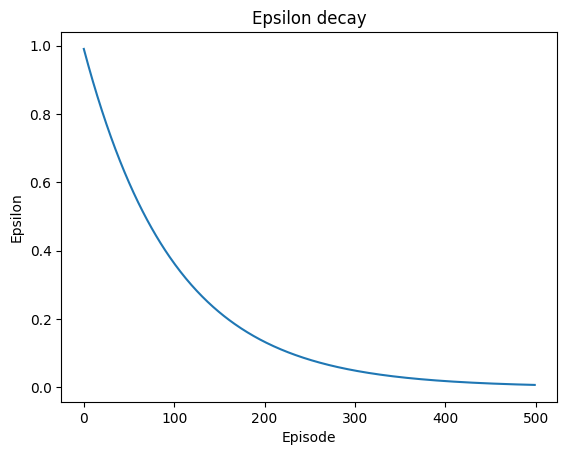

In [309]:
with output_grid.output_to(0, 0):
  plt.title('Epsilon decay')
  plt.plot(epsilon_decay1)
  plt.xlabel('Episode')
  plt.ylabel('Epsilon')

In [310]:
# SETUP 2
environment1 = GridEnvironment()
agent1 = SARSA(env=environment1, discount_rate= 0.8, learning_rate= 0.1, epsilon= 0.90 ,epsilon_decay_rate=0.88)


num_episodes = 1000


num_success = 0
num_fail = 0
total_reward = 0

epsilon_decay1 = []
episode_reward1 = []
episode_timestep1 = []

for episode in range(num_episodes):
    
    environment1.reset()
    state = state_dict[tuple([3,0])]

    
    done = False
    episode_reward_this = 0
    episode_timestep_this = 0
    num_bad_states = 0

   
    action = agent1.step(state)

    
    while not done:
        
        _, reward, done, _, _, _, next_state = environment1.step(action)

       
        next_action = agent1.step(next_state)

        agent1.train(experience=(state, action, next_state, next_action, reward, done))

       
        state = next_state
        action = next_action
        episode_reward_this += reward
        total_reward += reward
        episode_timestep_this += 1
        num_bad_states += 1 if reward < 0 else 0


    episode_timestep1.append(episode_timestep_this)
    epsilon_decay1.append(agent1.epsilon)
    episode_reward1.append(episode_reward_this)

    
    if done and environment1.timestep < 50:
        num_success += 1
    elif done and environment1.timestep == 50:
        num_fail += 1

print('\n Goal reached {} times and failed {} times'.format(num_success, num_fail))
print('End position of agent is in state {} with a total reward of {}'.format(state, total_reward))



 Goal reached 5 times and failed 995 times
End position of agent is in state 4 with a total reward of 291288


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

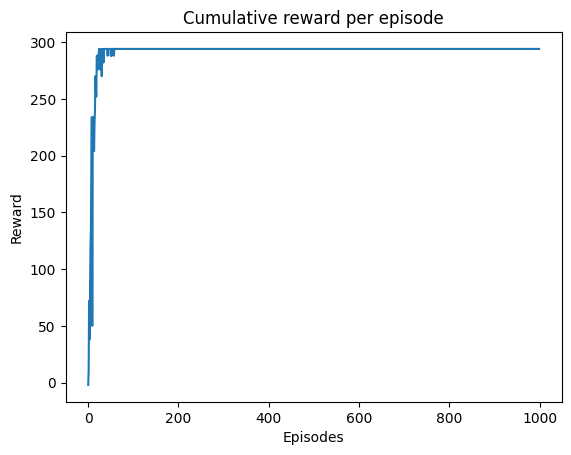

In [311]:
with output_grid.output_to(0, 0):
  plt.title('Cumulative reward per episode')
  plt.plot(episode_reward1)
  plt.xlabel('Episodes')
  plt.ylabel('Reward')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

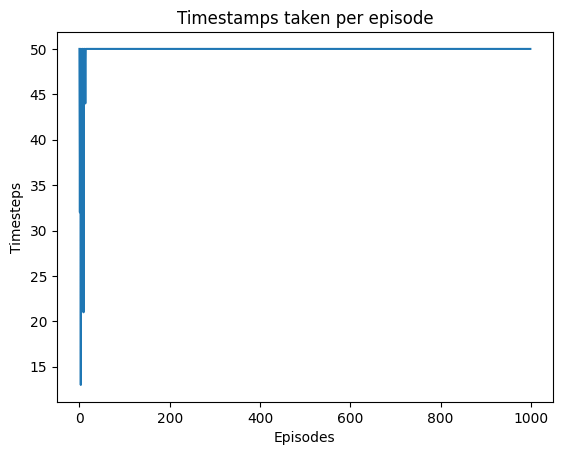

In [312]:
with output_grid.output_to(0, 0):
  plt.title('Timestamps taken per episode')
  plt.plot(episode_timestep1)
  plt.xlabel('Episodes')
  plt.ylabel('Timesteps')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

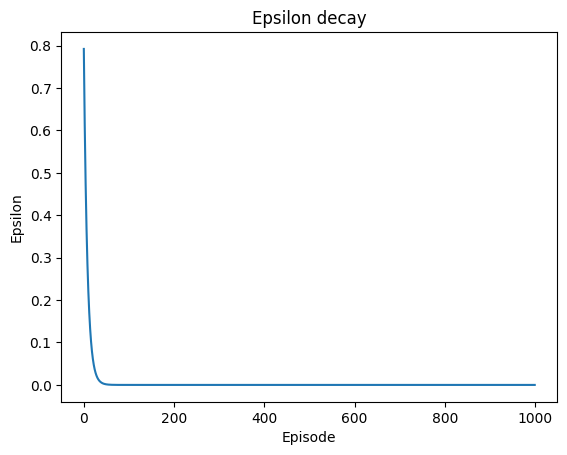

In [313]:
with output_grid.output_to(0, 0):
  plt.title('Epsilon decay')
  plt.plot(epsilon_decay1)
  plt.xlabel('Episode')
  plt.ylabel('Epsilon')

In [314]:
# SETUP 3
environment2 = GridEnvironment()
agent2 = SARSA(env=environment2, discount_rate= 0.7, learning_rate= 0.1, epsilon= 1.0 ,epsilon_decay_rate=0.77)

num_episodes = 1200


num_success = 0
num_fail = 0
total_reward = 0

epsilon_decay1 = []
episode_reward1 = []
episode_timestep1 = []

for episode in range(num_episodes):
    
    environment2.reset()
    state = state_dict[tuple([3,0])]

    
    done = False
    episode_reward_this = 0
    episode_timestep_this = 0
    num_bad_states = 0

   
    action = agent2.step(state)

    
    while not done:
        
        _, reward, done, _, _, _, next_state = environment2.step(action)

       
        next_action = agent2.step(next_state)

        agent2.train(experience=(state, action, next_state, next_action, reward, done))

       
        state = next_state
        action = next_action
        episode_reward_this += reward
        total_reward += reward
        episode_timestep_this += 1
        num_bad_states += 1 if reward < 0 else 0


    episode_timestep1.append(episode_timestep_this)
    epsilon_decay1.append(agent2.epsilon)
    episode_reward1.append(episode_reward_this)

    
    if done and environment2.timestep < 50:
        num_success += 1
    elif done and environment2.timestep == 50:
        num_fail += 1

print('\n Goal reached {} times and failed {} times'.format(num_success, num_fail))
print('End position of agent is in state {} with a total reward of {}'.format(state, total_reward))



 Goal reached 1 times and failed 1199 times
End position of agent is in state 4 with a total reward of 351598


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

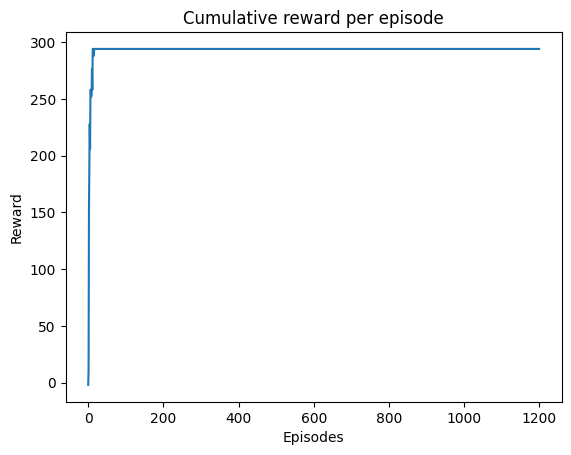

In [315]:
with output_grid.output_to(0, 0):
  plt.title('Cumulative reward per episode')
  plt.plot(episode_reward1)
  plt.xlabel('Episodes')
  plt.ylabel('Reward')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

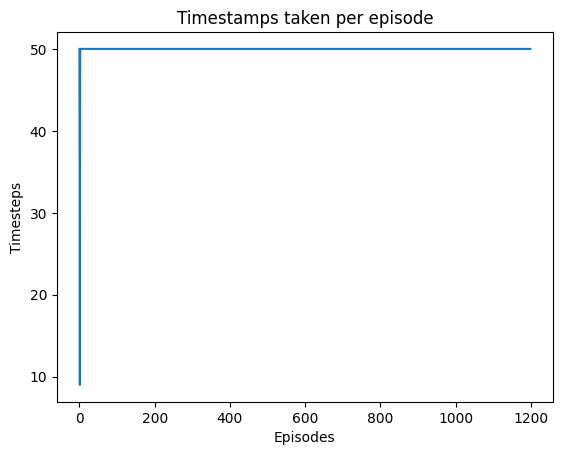

In [316]:
with output_grid.output_to(0, 0):
  plt.title('Timestamps taken per episode')
  plt.plot(episode_timestep1)
  plt.xlabel('Episodes')
  plt.ylabel('Timesteps')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

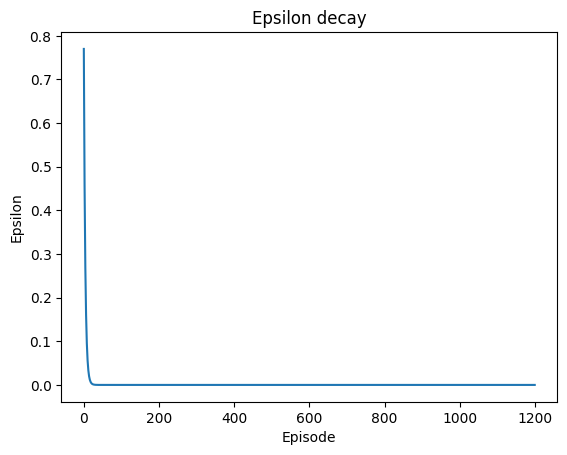

In [317]:
with output_grid.output_to(0, 0):
  plt.title('Epsilon decay')
  plt.plot(epsilon_decay1)
  plt.xlabel('Episode')
  plt.ylabel('Epsilon')